In [3]:
# ===== 라이브러리 =====
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

# ===== 데이터 불러오기 =====

DATA_PATH = "/content/drive/MyDrive/Col/머신러닝 3주차/weather.csv"
df = pd.read_csv(DATA_PATH).dropna()   # 원본 예제와 유사하게 결측행 제거
df  # print(df) 와 동일



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [4]:
# ===== 레이블 불균형 확인 =====
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,268
Yes,60


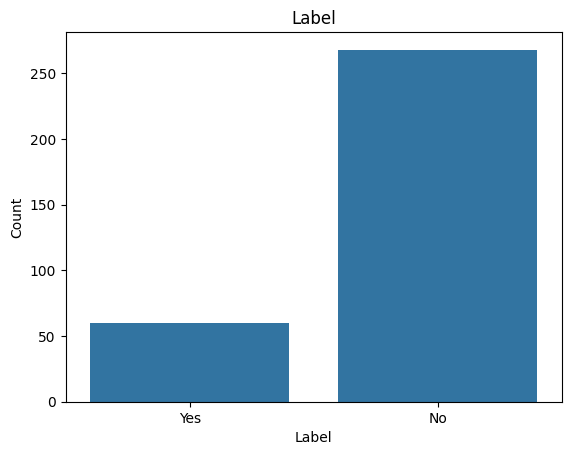

In [5]:
# ===== 레이블 갯수 확인 (그래프) =====
sns.countplot(x='RainTomorrow', data=df)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label")
plt.show()

In [6]:
# ===== 결측치 확인 =====
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [7]:
# ===== 학습/평가용 데이터 준비 =====
y = df['RainTomorrow']
X = df.drop(columns=['RainTomorrow'])

In [8]:
# 범주형 원-핫인코딩 (Iris와 달리 weather에는 문자열 컬럼 존재)
X = pd.get_dummies(X, drop_first=True)

In [9]:
# ===== train/test 분리 =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
# ===== 모델 학습 =====
clf_dt = DecisionTreeClassifier(random_state=42)
clf_rf = RandomForestClassifier(random_state=42, n_estimators=300)
clf_lr = LogisticRegression(max_iter=2000)

clf_dt.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [11]:
# ===== 정확도 평가 =====
pred_dt = clf_dt.predict(X_test)
pred_rf = clf_rf.predict(X_test)
pred_lr = clf_lr.predict(X_test)

acc_dt = accuracy_score(y_test, pred_dt)
acc_rf = accuracy_score(y_test, pred_rf)
acc_lr = accuracy_score(y_test, pred_lr)

print("DecisionTree accuracy:", round(acc_dt, 4))
print("RandomForest  accuracy:", round(acc_rf, 4))
print("LogisticReg  accuracy:", round(acc_lr, 4))

DecisionTree accuracy: 1.0
RandomForest  accuracy: 0.9697
LogisticReg  accuracy: 0.9545
